# Caso práctico final Modulo Aprendizaje Automatico

Bryan Mekuria Roque 
Master Data Science 


En este caso practico se desarollaran las tareas descritas en el PDF final de modulo que se detallaran en su respectivo apartado. Entre otras,procederemos al preprocesamiento de los datos, asi caso como la creacion de distintos modelos de clasificacion. 
En sintesis se intenta predecir que valores del dataset influyen mas en la variable objetivo "Revenue", y para ello se utilizaran diversos mecanismos vistos en clase, asi como en modulos anteriores. 



## Cargamos las librerías:

In [1]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Carga y lectura de los datos:

Para una mejor comprensión de la base de datos, voy a renombrar las columnas de ésta en castellano:

In [2]:
# Cargamos los datos teniendo el cuenta que están separados por ','
df = pd.read_csv('online_shoppers_intention.csv', sep= ',', index_col = False)
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# Tratamiento de los valores faltantes:

### Prepocesamiento de los datos

#### Missings:

Como se hace referencia en el enunciado, los valores faltantes existentes se tratarán con la función ***dropna()***. El método dropna permite filtrar los valores de una estructura de datos pandas para dejar solo aquellos no nulos.


In [4]:
df = df.dropna()
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Vemos que efectivamente ya no existen valores nulos en el dataset

In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.895952,0.061497,2.124147,2.357584,3.148019,4.070477
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.577926,0.199020,0.911566,1.718028,2.402211,4.024598
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## Tratamiento de datos. Lo convertiremos a Formato FlOAT O INT segun sea mas coveniente.

Utilizamos la funcion .info() para analizar klos tipos de datos presentes en el dataset()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12316 non-null  float64
 9   SpecialDay               12316 non-null  float64
 10  Month                    12316 non-null  object 
 11  OperatingSystems         12316 non-null  int64  
 12  Browser                  12316 non-null  int64  
 13  Region                   12316 non-null  int64  
 14  TrafficType           

Utilizaremos el metodo label encoder para pasar la variable objetivo categorica a numerica

In [7]:
le = LabelEncoder()

In [8]:
df.Revenue = le.fit_transform(df.Revenue.values)
df['Revenue'].value_counts()

0    10408
1     1908
Name: Revenue, dtype: int64

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12316 non-null  float64
 9   SpecialDay               12316 non-null  float64
 10  Month                    12316 non-null  object 
 11  OperatingSystems         12316 non-null  int64  
 12  Browser                  12316 non-null  int64  
 13  Region                   12316 non-null  int64  
 14  TrafficType           

Convertiremos aquellos no numericos en numericos por la via mas conveniente en su caso.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12316 non-null  float64
 9   SpecialDay               12316 non-null  float64
 10  Month                    12316 non-null  object 
 11  OperatingSystems         12316 non-null  int64  
 12  Browser                  12316 non-null  int64  
 13  Region                   12316 non-null  int64  
 14  TrafficType           

In [11]:
# Convertimos la columna VisitorType en numero usando un diccionario:

dic1 = {'Returning_Visitor':0, 'New_Visitor':1, 'Other':2}
       
df['VisitorType'].replace(dic1, inplace = True)
df['VisitorType'] = df['VisitorType'].astype(int) 
df['VisitorType'].value_counts()

0    10537
1     1694
2       85
Name: VisitorType, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12316 non-null  float64
 9   SpecialDay               12316 non-null  float64
 10  Month                    12316 non-null  object 
 11  OperatingSystems         12316 non-null  int64  
 12  Browser                  12316 non-null  int64  
 13  Region                   12316 non-null  int64  
 14  TrafficType           

In [13]:
dic2 = {'False':0, 'True':1}
       
df['Weekend'].replace(dic2, inplace = True)
df['Weekend'] = df['Weekend'].astype(int) 
df['Weekend'].value_counts()

0    9451
1    2865
Name: Weekend, dtype: int64

In [14]:
dic3 = {'Jan':1, 'Feb':2, 'Mar': 3, 'Apr':4, 'May':5,
       'June':6, 'Jul':7,'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
       
df["Month"].replace(dic3, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12316 non-null  float64
 9   SpecialDay               12316 non-null  float64
 10  Month                    12316 non-null  int64  
 11  OperatingSystems         12316 non-null  int64  
 12  Browser                  12316 non-null  int64  
 13  Region                   12316 non-null  int64  
 14  TrafficType           

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12316 non-null  float64
 9   SpecialDay               12316 non-null  float64
 10  Month                    12316 non-null  int64  
 11  OperatingSystems         12316 non-null  int64  
 12  Browser                  12316 non-null  int64  
 13  Region                   12316 non-null  int64  
 14  TrafficType           

In [16]:
df["Administrative"] = df["Administrative"].astype(int)

In [17]:
df["Administrative"] = df["Administrative"].astype(int)

In [18]:
df["Administrative_Duration"] = df["Administrative_Duration"].astype(float)
df["Administrative_Duration"] = df["Administrative_Duration"].apply(lambda x: round(x,2))

In [19]:
df["Informational"] = df["Informational"].astype(int)

In [20]:
df['Informational_Duration'] = df['Informational_Duration'].astype(float) 
df['Informational_Duration'] = df['Informational_Duration'].apply(lambda x: round(x,2)) 
df.loc[df.Informational_Duration == -1, 'Informational_Duration'] = 0

In [21]:
df['ProductRelated'] = df['ProductRelated'].astype(int) 

In [22]:
df['ProductRelated_Duration'] = df['ProductRelated_Duration'].astype(float) 
df['ProductRelated_Duration'] = df['ProductRelated_Duration'].apply(lambda x: round(x,2))
df.loc[df.ProductRelated_Duration == -1, 'Informational_Duration'] = 0

In [23]:
df['BounceRates'] = df['BounceRates'].astype(float) 
df['BounceRates'] = df['BounceRates'].apply(lambda x: round(x,2)) 


In [24]:
df['ExitRates'] = df['ExitRates'].astype(float) 
df['ExitRates'] = df['ExitRates'].apply(lambda x: round(x,2)) 


In [25]:
df['PageValues'] = df['PageValues'].astype(float) 
df['PageValues'] = df['PageValues'].apply(lambda x: round(x,2)) 

In [26]:
df['SpecialDay'] = df['SpecialDay'].astype(float) 
df['SpecialDay'] = df['SpecialDay'].apply(lambda x: round(x,2)) 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  int64  
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  int64  
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  int64  
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12316 non-null  float64
 9   SpecialDay               12316 non-null  float64
 10  Month                    12316 non-null  int64  
 11  OperatingSystems         12316 non-null  int64  
 12  Browser                  12316 non-null  int64  
 13  Region                   12316 non-null  int64  
 14  TrafficType           

Como se puede ver, una vez aplicadas las transformaciones pertinentes, ya no existen columnas donde hayan valores de tipo object.

# Realización de un análisis de las variables del dataset de Google Analytics como pueden ser histogramas, boxplots, etc.

### División en features X + target Y

In [28]:
X = df.drop("Revenue", axis = 1) #en X almacenamos el DF sin la target
Y = df["Revenue"] # aqui almacenamos la target 

In [29]:
X[:2]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,2,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,2,2,2,1,2,0,0


In [30]:
Y[:2]

0    0
1    0
Name: Revenue, dtype: int64

### Visualizaciones y correlaciones

In [31]:
X.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,2.317798,80.906162,0.503979,34.509070,31.763884,1196.037065,0.022145,0.043046,5.895932,0.061497,7.657113,2.124147,2.357584,3.148019,4.070477,0.151348,0.232624
std,3.322754,176.860406,1.270701,140.824819,44.490339,1914.372508,0.048511,0.048582,18.577893,0.199020,3.391314,0.911566,1.718028,2.402211,4.024598,0.377169,0.422522
min,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.010000,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.765000,0.000000,0.030000,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.480000,0.020000,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.380000,705.000000,63973.520000,0.200000,0.200000,361.760000,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000


In [32]:
X_normalizado = (X-X.mean())/X.std()

In [33]:
X_normalizado[:5]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.697553,-0.457458,-0.396615,-0.24505,-0.691473,-0.624767,3.666264,3.230740,-0.317363,-0.309001,-1.668118,-1.233205,-0.790199,-0.894184,-0.762928,-0.401273,-0.550561
1,-0.697553,-0.457458,-0.396615,-0.24505,-0.668997,-0.591336,-0.456496,1.172346,-0.317363,-0.309001,-1.668118,-0.136191,-0.208136,-0.894184,-0.514456,-0.401273,-0.550561
2,-0.697553,-0.463112,-0.396615,-0.24505,-0.691473,-0.625290,3.666264,3.230740,-0.317363,-0.309001,-1.668118,2.057835,-0.790199,2.436081,-0.265984,-0.401273,-0.550561
3,-0.697553,-0.457458,-0.396615,-0.24505,-0.668997,-0.623372,0.574194,1.995703,-0.317363,-0.309001,-1.668118,0.960822,-0.208136,-0.477901,-0.017512,-0.401273,-0.550561
4,-0.697553,-0.457458,-0.396615,-0.24505,-0.489182,-0.296984,-0.044220,0.143148,-0.317363,-0.309001,-1.668118,0.960822,0.373927,-0.894184,-0.017512,-0.401273,1.816180


### Graficos y visualizaciones:

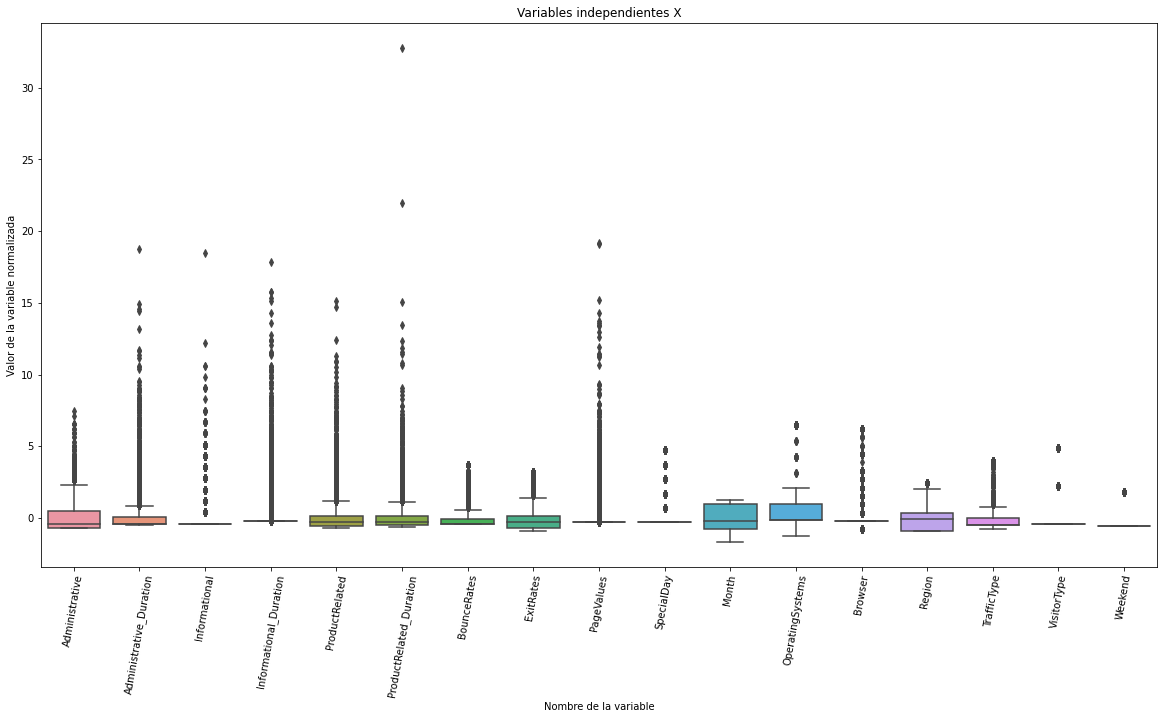

In [34]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(data=X_normalizado)
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
plt.title(u'Variables independientes X')
plt.ylabel('Valor de la variable normalizada')
_ = plt.xlabel('Nombre de la variable')

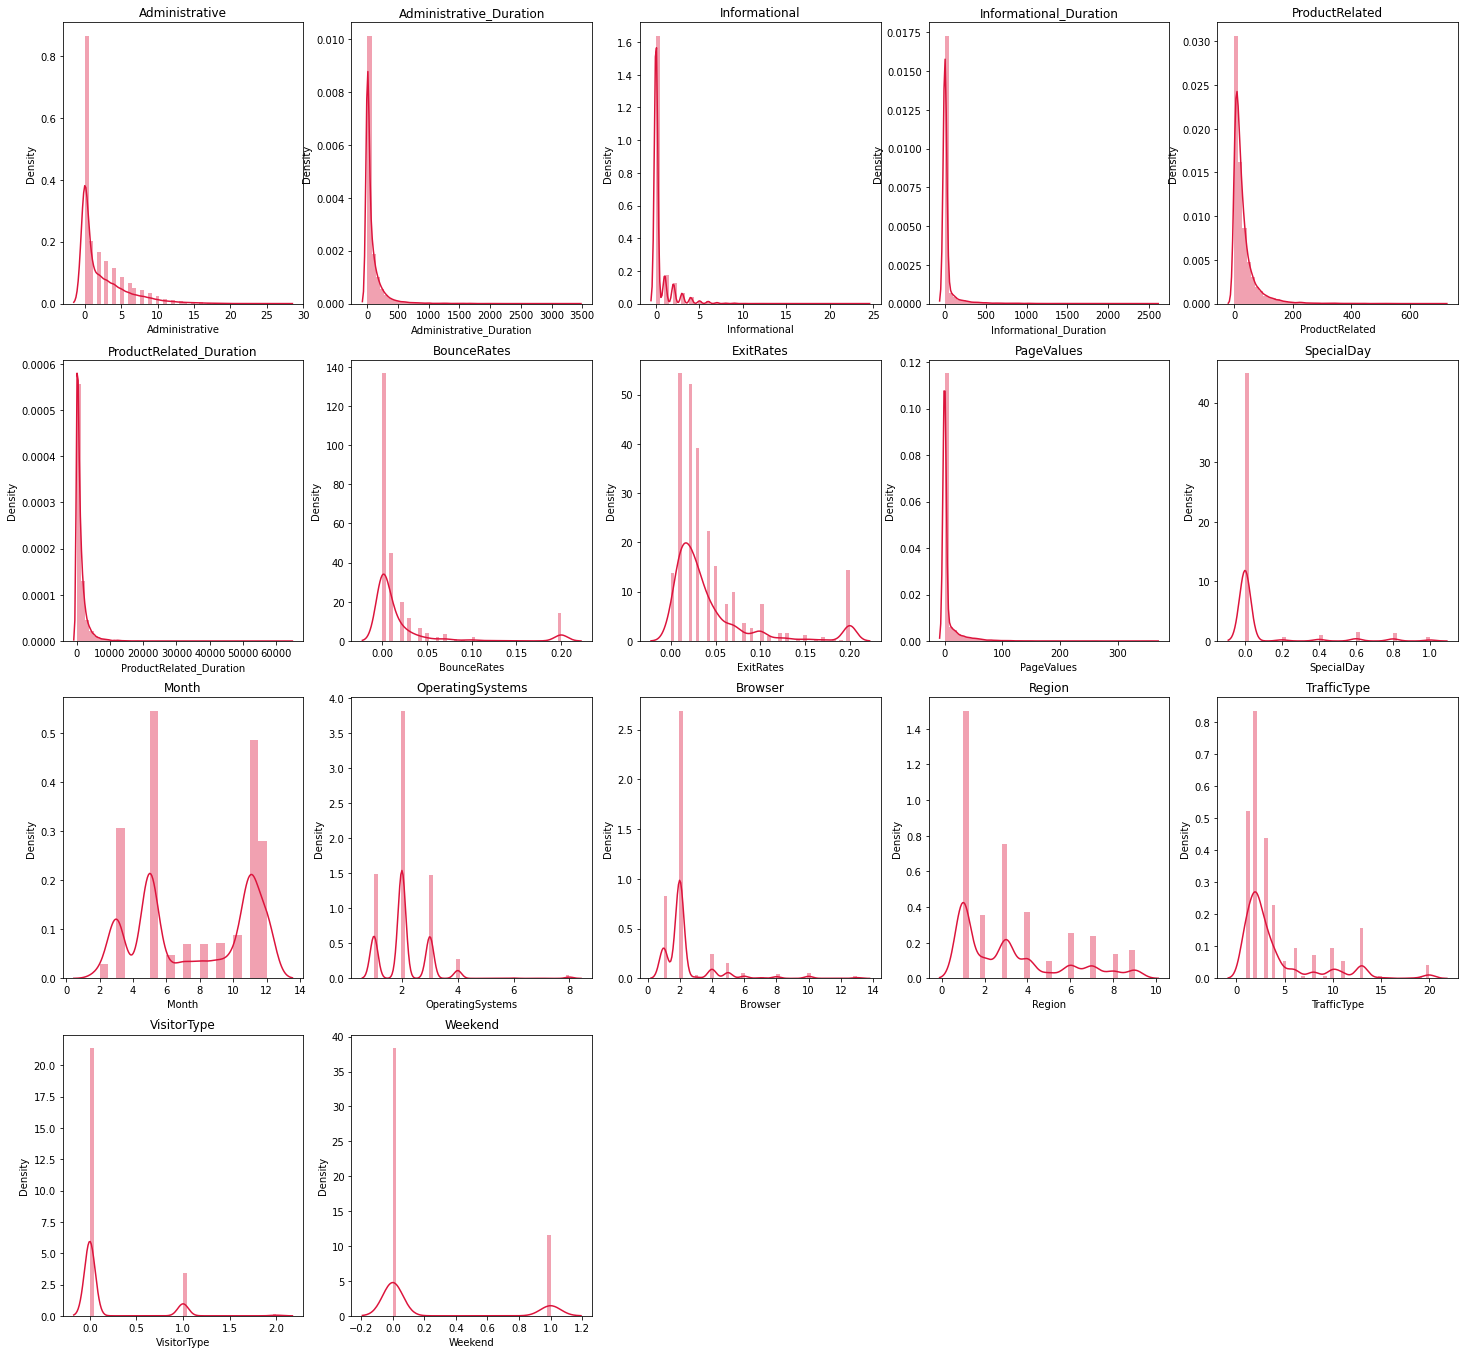

In [35]:
plt.figure(figsize=(25,30))

for i, column in enumerate(X.columns):

    plt.subplot(5, 5, i+1)
    try:
        sns.distplot(X[column], color = "crimson")
    except:
        pass
    plt.title('{}'.format(column))
plt.show()

A pesar de no poder sacar conclusiones definitivas si podemos observar una gran dispersion en las variables dependientes en su gran mayoria. Dichos valores se tratara en posteriores apartados.

## Tratamiento de los valores outliers:

Los outliers son aquellos valores que se escapan al rango en donde se concentran la mayoría de muestras.

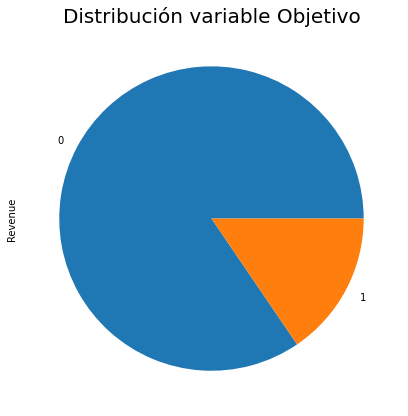

In [36]:
df["Revenue"].value_counts().plot(kind = "pie", figsize = (7,7)) 
_ = plt.title("Distribución variable Objetivo", fontsize = 20) 

Como es logico el numero de clientes que no generan beneficios supera con creces aquellos que si lo producen.

### Representación del PCA de las clases

El análisis de componentes principales (Principal Component Analysis PCA) es un método de reducción de dimensionalidad que permite simplificar la complejidad de espacios con múltiples dimensiones a la vez que conserva su información. El método de PCA permite por lo tanto condensar la información aportada por múltiples variables en solo unas pocas componentes.

In [37]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import scikitplot as skplt
new_style = {'grid': False}
plt.rc('axes', **new_style)

ModuleNotFoundError: No module named 'scikitplot'

In [ ]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def repre_matriz_confusion(matriz):
    df_matriz_confusion = pd.DataFrame(matriz,
                     ['True IN','True NO IN'],
                     ['Pred IN','Pred NO IN'])
    plt.figure(figsize = (8,4))
    sns.set(font_scale=1.4)
    plt.title(u'Matriz de confusión')
    _ = sns.heatmap(df_matriz_confusion, annot=True, annot_kws={"size": 16}, fmt='g')
    
def reporting_modelo(y_reales, y_clase):
    matriz_confusion = metrics.confusion_matrix(y_reales, y_clase)
    roc_auc = metrics.roc_auc_score(y_reales, y_clase)
    metrica_f1 = metrics.f1_score(y_reales, y_clase)
    print(u'La AUC de la ROC es de: {}'.format(round(roc_auc,2)))
    print(u'La F1 es de: {}'.format(round(metrica_f1,2)))
    print("\nAccuracy\t{}".format(round(metrics.accuracy_score(y_reales, y_clase),3)))  
    print("Sensitividad\t{}".format(round(metrics.recall_score(y_reales, y_clase),3)))
    print(u"Precisión\t{}".format(round(metrics.precision_score(y_reales, y_clase),3)))   
    repre_matriz_confusion(matriz_confusion)


In [ ]:
df_plt=df[df["Revenue"]==0].sample(2000)
df_plt_pos=df[df["Revenue"]==1].sample(20)
df_plt=pd.concat([df_plt,df_plt_pos])
y_plt=df_plt["Revenue"]
X_plt=df_plt.drop("Revenue",axis=1)

In [ ]:
pca2 = PCA(n_components=3)
X_PCA = pca2.fit_transform(X_plt)

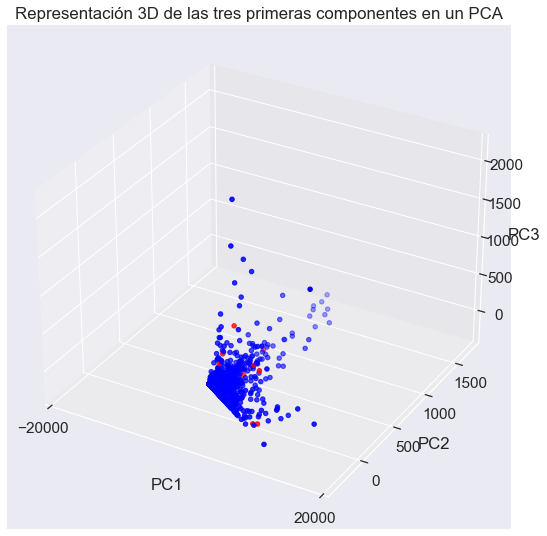

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = Axes3D(fig)
ax.scatter(X_PCA[:,0], X_PCA[:,1], X_PCA[:,2], c=y_plt, cmap=plt.cm.get_cmap("bwr"))
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_xticks([-20000,20000])
ax.set_title('Representación 3D de las tres primeras componentes en un PCA')
plt.show()

### Local Outlier Factor:

El algoritmo Local Outlier Factor (LOF) es un método de detección de anomalías no supervisado que calcula la desviación de densidad local de un punto de datos dado con respecto a sus vecinos. Considera como valores atípicos las muestras que tienen una densidad sustancialmente más baja que sus vecinas

In [ ]:
clf=LocalOutlierFactor(n_neighbors=20, 
                        algorithm='auto', 
                        leaf_size=30,
                        metric='minkowski', 
                        p=2, 
                        metric_params=None, 
                        n_jobs=-1,
                        novelty=False)

In [ ]:
%%time
clf.fit(X)

CPU times: user 10.6 s, sys: 2.24 s, total: 12.9 s
Wall time: 6.85 s


LocalOutlierFactor(n_jobs=-1)

In [ ]:
factores_lof = clf.negative_outlier_factor_
factores_lof

array([-1.30292082, -1.01819379, -1.3297442 , ..., -1.02335218,
       -1.01061672, -1.00735108])

In [ ]:
Y_pred_clase = factores_lof.copy()
Y_pred_clase[factores_lof>=np.percentile(factores_lof,2.)] = 0
Y_pred_clase[factores_lof<np.percentile(factores_lof,2.)] = 1

La AUC de la ROC es de: 0.52
La F1 es de: 0.1

Accuracy	0.842
Sensitividad	0.055
Precisión	0.425


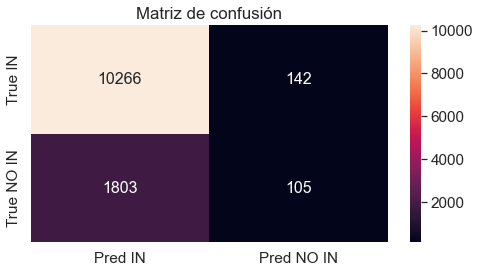

In [ ]:
reporting_modelo(Y, Y_pred_clase) 

### Representación de las probabilidades:

In [ ]:
Y_probs = NormalizeData(factores_lof)
Y_pred_prob_pos = NormalizeData(factores_lof)[np.where(Y == 1)]
Y_pred_prob_neg = NormalizeData(factores_lof)[np.where(Y == 0)]

# Estandarizacion datos

In [ ]:
obj_escalar = StandardScaler()
X_estandarizado = obj_escalar.fit_transform(X)

### División en train y test: 

La función sklearn train_test_split nos permite dividir un dataset en dos bloques, típicamente bloques destinados al entrenamiento y validación del modelo

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_estandarizado, Y, test_size=0.2, random_state=0)

#### Gráfico de correlaciones

## Correlación de las variables independientes con la target

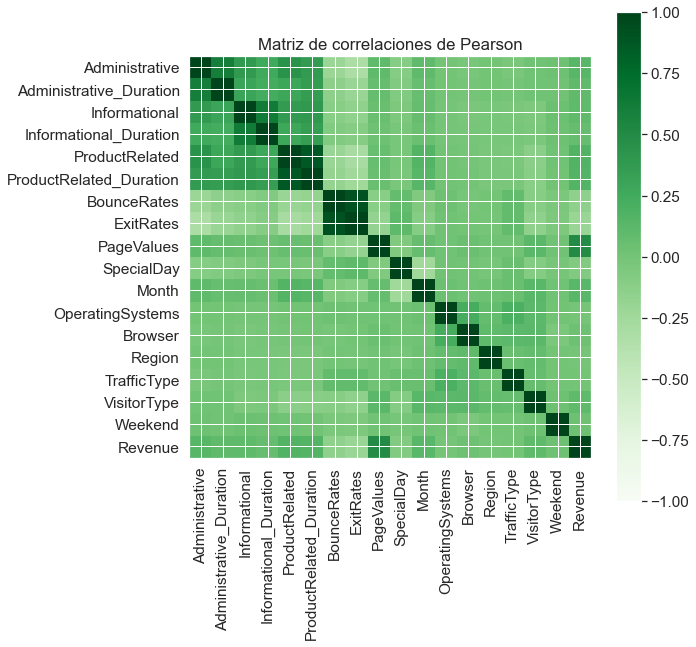

In [ ]:
matriz_correlaciones = df.corr(method='pearson')
n_ticks = len(df.columns)
plt.figure( figsize=(9, 9) )
plt.xticks(range(n_ticks), df.columns, rotation='vertical')
plt.yticks(range(n_ticks), df.columns)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=plt.get_cmap('Greens')))
_ = plt.title('Matriz de correlaciones de Pearson')

In [ ]:
correlaciones_target = matriz_correlaciones.values[ -1, : -1]
indices_inversos =  abs(correlaciones_target[ : ]).argsort()[ : : -1]
diccionario = {}
for nombre, correlacion in zip( X.columns[indices_inversos], list(correlaciones_target[indices_inversos] ) ):
    diccionario[nombre] = correlacion
pd.DataFrame.from_dict(diccionario, orient='index', columns=['Correlación con la target'])

,Correlación con la target
PageValues,0.492494
ExitRates,-0.206763
ProductRelated,0.158280
ProductRelated_Duration,0.152130
BounceRates,-0.151561
Administrative,0.138631
Month,0.126868
VisitorType,0.098309
Informational,0.095085
Administrative_Duration,0.093395


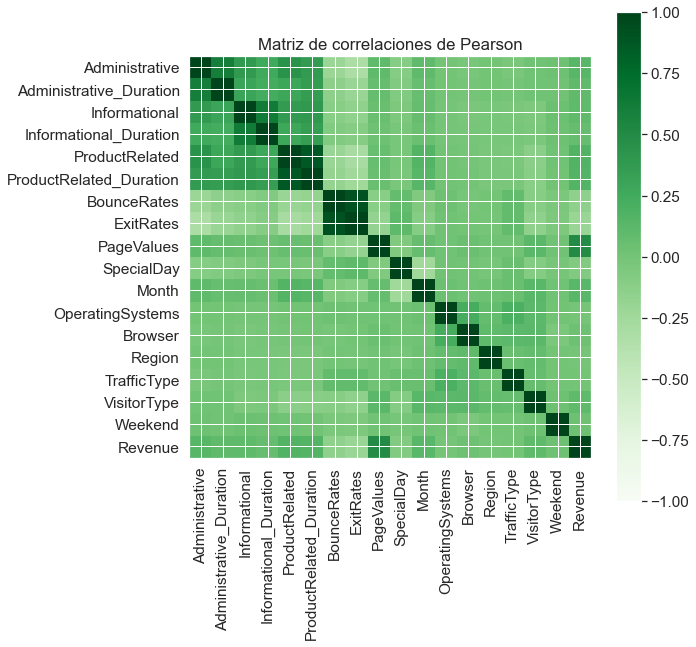

In [ ]:
# Representa la matriz de correlaciones
matriz_correlaciones = df.corr(method='pearson')
n_ticks = len(df.columns)
plt.figure( figsize=(9, 9) )
plt.xticks(range(n_ticks), df.columns, rotation='vertical')
plt.yticks(range(n_ticks), df.columns)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=plt.get_cmap('Greens')))
_ = plt.title('Matriz de correlaciones de Pearson')

Como regla general podemos observar una correlacion bastante debil entre las variables respecto a la Target.

# Utilización de un modelo lineal de Regresión logística:

La regresión logística es un algoritmo de clasificación de aprendizaje automático que se utiliza para predecir la probabilidad de una variable dependiente categórica. En la regresión logística, la variable dependiente es una variable binaria que contiene datos codificados como 1 (sí, éxito, etc.) o 0 (no, fracaso, etc.)

In [ ]:
modelo = LogisticRegression()
parametros = {"C": [0., 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,0.09], 
              "class_weight":['balanced', None]}

Optimizacion con GridSerach. Esta función ayuda a recorrer hiperparámetros predefinidos y ajustar su estimador

In [ ]:
modelo_gs = GridSearchCV(modelo, param_grid = parametros,
                         cv = 6, scoring = 'roc_auc')
modelo_gs.fit(X_train, Y_train)

GridSearchCV(cv=6, estimator=LogisticRegression(),
             param_grid={'C': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,
                               0.08, 0.09],
                         'class_weight': ['balanced', None]},
             scoring='roc_auc')

In [ ]:
print(modelo_gs.best_params_, "\nROC AUC: {}".format(round(modelo_gs.best_score_,2)))

{'C': 0.09, 'class_weight': 'balanced'} 
ROC AUC: 0.9


In [ ]:
df_search = pd.DataFrame.from_dict(modelo_gs.cv_results_)
df_search[0:2]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004815,0.001061,0.0,0.0,0.0,balanced,"{'C': 0.0, 'class_weight': 'balanced'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
1,0.003123,0.000405,0.0,0.0,0.0,None,"{'C': 0.0, 'class_weight': None}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19


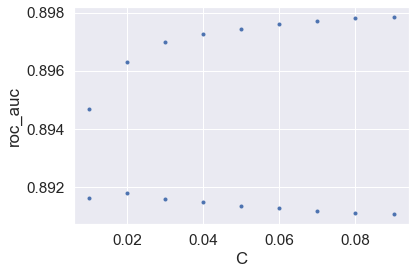

In [ ]:
plt.xlabel('C')
plt.ylabel('roc_auc')
_ = plt.plot( df_search['param_C'], df_search['mean_test_score'], '.')

In [ ]:
y_test_pred_prob_x = modelo_gs.predict_proba(X_test)
ROC_log = metrics.roc_auc_score(Y_test, y_test_pred_prob_x[:,1] )
ROC_log

0.8932692895573491

### Analizando el modelo con el mejor alpha 

En este paso, ajustamos el modelo con los mejores parámetros que hemos sacado antes:

In [ ]:
print(modelo_gs.best_params_, "\nROC AUC: {}".format(round(modelo_gs.best_score_,2)))

{'C': 0.09, 'class_weight': 'balanced'} 
ROC AUC: 0.9


In [ ]:
reg_log =  LogisticRegression(C=modelo_gs.best_params_['C'],
                              class_weight=modelo_gs.best_params_['class_weight'])

### Entrenamos el modelo

In [ ]:
reg_log.fit(X_train, Y_train)

LogisticRegression(C=0.09, class_weight='balanced')

Ahora con el cojunto test vamos a ver que resultados se tiene con datos que no se han visto con anterioridad:

In [ ]:
y_test_pred_prob = reg_log.predict_proba(X_test)
y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]

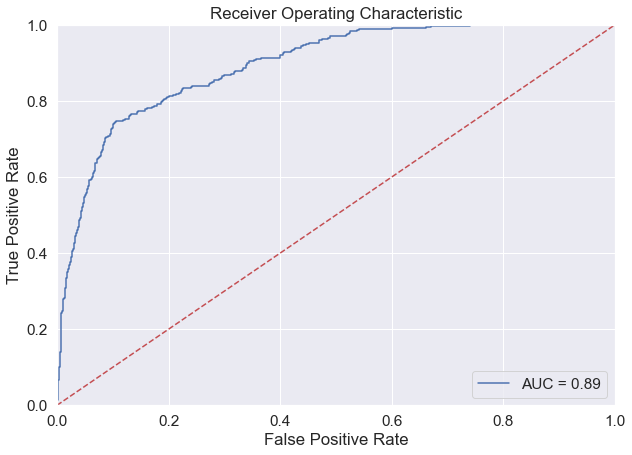

In [ ]:
preds = y_test_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Umbralizacion de las predicciones

In [ ]:
umbral = 0.5
y_umbralizadas = 1*(y_test_pred_prob[:,1]>umbral)

La AUC de la ROC es de: 0.82
La F1 es de: 0.64

Accuracy	0.872
Sensitividad	0.745
Precisión	0.56
None


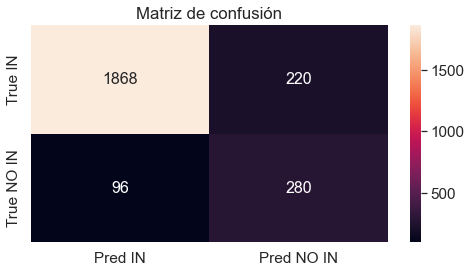

In [ ]:
print(reporting_modelo(Y_test, y_umbralizadas))

#  Utilización de un modelo de redes neuronales:

In [ ]:
## Perceptrón multicapa (MLP)

El perceptrón multicapa (MLP) es un modelo de red neuronal artificial feedforward que asigna conjuntos de datos de entrada a un conjunto de salidas apropiadas. Un MLP consta de múltiples capas y cada capa está completamente conectada a la siguiente. Los nodos de las capas son neuronas con funciones de activación no lineales, excepto los nodos de la capa de entrada. Entre la capa de entrada y la de salida puede haber una o más capas ocultas no lineales.

In [ ]:
modelo2 = MLPClassifier()
parametros2 = {'solver': ['lbfgs'], 
              'max_iter': [100,200,300,500], 
              'alpha': 10.0 ** -np.arange(1, 3), 
              'hidden_layer_sizes':np.arange(30, 35),
              'random_state':[0]}

In [ ]:
modelo_gs2 = GridSearchCV(modelo2, param_grid=parametros2, cv = 3, 
                         scoring='roc_auc', n_jobs=-1, verbose=10)
modelo_gs2.fit(X_train, Y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': array([0.1 , 0.01]),
                         'hidden_layer_sizes': array([30, 31, 32, 33, 34]),
                         'max_iter': [100, 200, 300, 500], 'random_state': [0],
                         'solver': ['lbfgs']},
             scoring='roc_auc', verbose=10)

In [ ]:
print(modelo_gs2.best_params_, "\nROC AUC: {}".format(round(modelo_gs2.best_score_,2)))

{'alpha': 0.1, 'hidden_layer_sizes': 30, 'max_iter': 100, 'random_state': 0, 'solver': 'lbfgs'} 
ROC AUC: 0.9


## Mejores parámetros:
Al igual que en el modelo anterior, sacamos los parámetros más óptimos y creamos un modelo con dichos parámetros:

In [ ]:
mejor_modelo2 = MLPClassifier(**modelo_gs2.best_params_)

In [ ]:
mejor_modelo2.fit(X_train, Y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=30, max_iter=100, random_state=0,
              solver='lbfgs')

In [ ]:
y_test_pred_prob2 = mejor_modelo2.predict_proba(X_test) 
y_test_pred_prob_pos2 = y_test_pred_prob2[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg2 = y_test_pred_prob2[np.where(Y_test == 0)[0]]

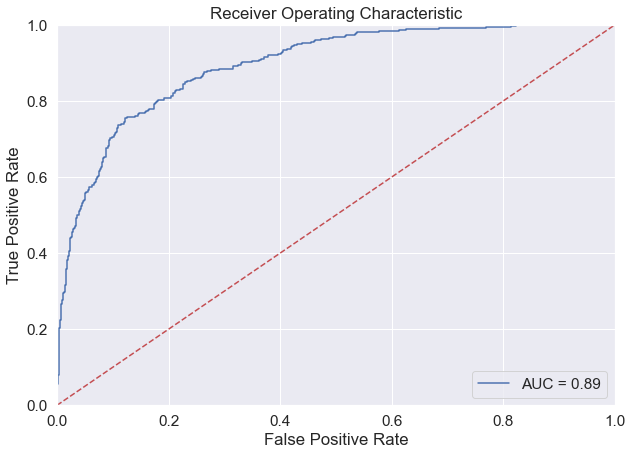

In [ ]:
preds2 = y_test_pred_prob2[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(Y_test, preds2)
roc_auc2 = metrics.auc(fpr2, tpr2)

plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## ROC RED NEURONAL

In [ ]:
ROC_red_Neuroal = metrics.roc_auc_score(Y_test, preds2)
ROC_red_Neuroal

0.8942449763593381

In [ ]:
## Umbralizo las predicciones:

In [ ]:
umbral2 = 0.50
y_umbralizadas2 = 1*(preds2 > umbral2)

La AUC de la ROC es de: 0.75
La F1 es de: 0.6

Accuracy	0.889
Sensitividad	0.54
Precisión	0.668
None


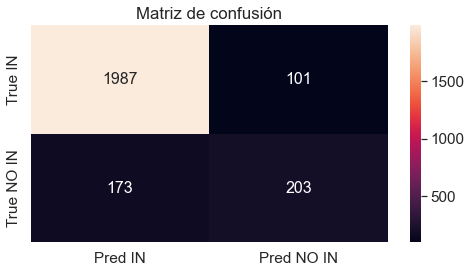

In [ ]:
print(reporting_modelo(Y_test, y_umbralizadas2))

# Algoritmo clasificacion K Nearest Neighbours


El modelo de KNN es un método que simplemente busca en las observaciones más cercanas a la que se está tratando de predecir y clasifica el punto de interés basado en la mayoría de datos que le rodean. 

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN2 = KNeighborsClassifier(n_neighbors = 5)
KNN2.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(KNN2.score(X_train, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(KNN2.score(X_test, Y_test)))

Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.87


Vemos que la precisión que nos da es de 0.90% en el set de entrenamiento y del 87% para el de prueba.

## Precisión del modelo

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
pred = KNN2.predict(X_test)
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

[[2019   69]
 [ 246  130]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2088
           1       0.65      0.35      0.45       376

    accuracy                           0.87      2464
   macro avg       0.77      0.66      0.69      2464
weighted avg       0.86      0.87      0.86      2464



## Elegir el mejor valor de K

([<matplotlib.axis.XTick at 0x7fa8c4b49820>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

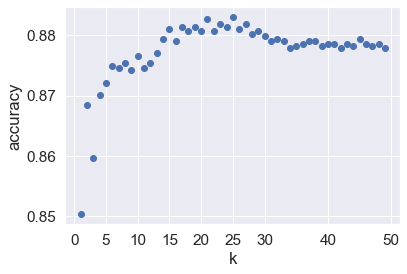

In [ ]:
k_range = range(1, 50)
scores = []
for k in k_range:
    KNN2 = KNeighborsClassifier(n_neighbors = k)
    KNN2.fit(X_train, Y_train)
    scores.append(KNN2.score(X_test, Y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30,40,50])

En la gráfica vemos que con valores k=25 es donde mayor precisión se logra por lo que modificamos nuestro modelo original.

### Ajustamos el modelo nuevamente:

In [ ]:
n_neighbors = 25
 
KNN3 = KNeighborsClassifier(n_neighbors)
KNN3.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=25)

In [ ]:
pred = KNN3.predict(X_test)
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

[[2066   22]
 [ 266  110]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.93      2088
           1       0.83      0.29      0.43       376

    accuracy                           0.88      2464
   macro avg       0.86      0.64      0.68      2464
weighted avg       0.88      0.88      0.86      2464



Vemos como una vez ajustado los parametros la precision del modelo aumenta de forma considerable

In [ ]:
K_test_prob = KNN3.predict_proba(X_test) 
K_test_prob_pos = K_test_prob[np.where(Y_test == 1)[0]]
K_test_prob_neg = K_test_prob[np.where(Y_test == 0)[0]]

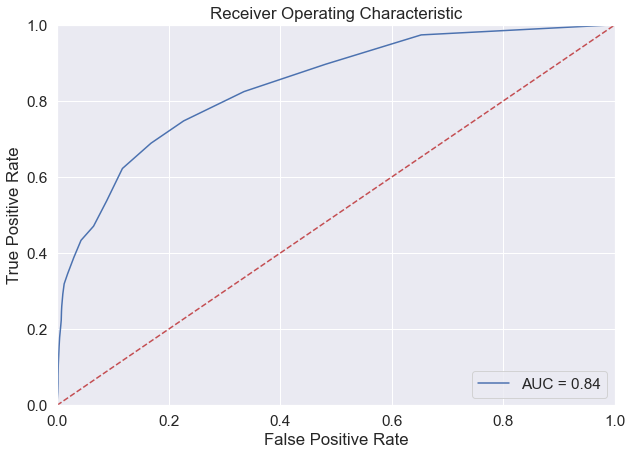

In [ ]:
predsK = K_test_prob[:,1]
fpr3, tpr3, threshold3 = metrics.roc_curve(Y_test, predsK)
roc_auc3 = metrics.auc(fpr3, tpr3)

plt.figure(figsize=(10,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr3, tpr3, 'b', label = 'AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## ROC K Nearest Neighbours

In [ ]:
ROC_KNN = metrics.roc_auc_score(Y_test, predsK)
ROC_KNN

0.8415075762207549